In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [36]:
# get the vehicle database
vehicle_df = pd.read_csv("vehicle_data.csv.gz", compression="gzip")
vehicle_df.head(100)

,record_type,vin,registration_class,city,state,zip,county,model_year,make,body_type,fuel_type,unladen_weight,color,scofflaw_indicator,suspension_indicator,revocation_indicator,maximum_gross_weight,vehicle_age
0,VEH,999407G3573,PAS,SARATOGA SPRIN,NY,12866,SARATOGA,1976,LA/RO,SUBN,GAS,3500,WH,N,N,N,NaN,45
1,VEH,9992313,PAS,CAMDEN,NY,13316,ONEIDA,1924,FORD,CONV,GAS,1527,BK,N,N,N,NaN,97
2,VEH,998867,PAS,MINEOLA,NY,11501,NASSAU,1952,STUDE,2DSD,GAS,2825,RD,N,N,N,NaN,69
3,VEH,9983692,PAS,MIDDLETOWN,NY,10940,ORANGE,1936,PACKA,2DSD,GAS,3380,BK,N,N,N,NaN,85
4,VEH,99782010525,PAS,BROOKLYN,NY,11225,KINGS,1978,SAAB,2DSD,GAS,2470,WH,N,N,N,NaN,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,VEH,9804210002920,PAS,HUNTINGTON,NY,11743,SUFFOLK,1963,ME/BE,CONV,GAS,2690,WH,N,N,N,NaN,58
96,VEH,980A105883,PAS,WYNANTSKILL,NY,12198,RENSSELAER,1949,FORD,2DSD,GAS,3274,BL,N,N,N,NaN,72
97,VEH,98W6043,PAS,BRONX,NY,10469,BRONX,1948,OLDSM,4DSD,GAS,3723,GR,N,N,N,NaN,73
98,VEH,98RY150707,COM,PETERSNURGH,NY,12138,RENSSELAER,1949,FORD,PICK,GAS,NaN,RD,N,N,N,4500,72


In [37]:
# create a dataframe for all vehicles upto 2009
vehicle_df_2009 = vehicle_df.loc[vehicle_df['model_year'].astype(int) <= 2009]

# find the age of cars
veh_age_2009 = 2009 - vehicle_df_2009['model_year'].astype(int)

# create a new dataframe with an vehicle age column
new_vehicle_2009_df = pd.DataFrame(vehicle_df_2009)
new_vehicle_2009_df['vehicle_age'] = veh_age_2009
new_vehicle_2009_df.head()


,record_type,vin,registration_class,city,state,zip,county,model_year,make,body_type,fuel_type,unladen_weight,color,scofflaw_indicator,suspension_indicator,revocation_indicator,maximum_gross_weight,vehicle_age
0,VEH,999407G3573,PAS,SARATOGA SPRIN,NY,12866,SARATOGA,1976,LA/RO,SUBN,GAS,3500,WH,N,N,N,NaN,33
1,VEH,9992313,PAS,CAMDEN,NY,13316,ONEIDA,1924,FORD,CONV,GAS,1527,BK,N,N,N,NaN,85
2,VEH,998867,PAS,MINEOLA,NY,11501,NASSAU,1952,STUDE,2DSD,GAS,2825,RD,N,N,N,NaN,57
3,VEH,9983692,PAS,MIDDLETOWN,NY,10940,ORANGE,1936,PACKA,2DSD,GAS,3380,BK,N,N,N,NaN,73
4,VEH,99782010525,PAS,BROOKLYN,NY,11225,KINGS,1978,SAAB,2DSD,GAS,2470,WH,N,N,N,NaN,31


In [38]:
# retrieve the AQI index for zipcodes in NY
aqi_df = pd.read_csv("AQIndex2009.csv", index_col=0)

# convert zipcode dtype to int
aqi_df['zip']=aqi_df['zip'].astype(int)
new_vehicle_2009_df['zip']=new_vehicle_2009_df['zip'].astype(int)

# merge the 2 dataframes on zipcode
vehicle_aqi_2009_df = pd.merge(aqi_df, new_vehicle_2009_df, on=['zip','zip'], how="left" )
vehicle_aqi_2009_df


,zip,AQI,Category Number,Category Name,Pollutant,record_type,vin,registration_class,city,state,...,make,body_type,fuel_type,unladen_weight,color,scofflaw_indicator,suspension_indicator,revocation_indicator,maximum_gross_weight,vehicle_age
0,12032,90,2,Moderate,OZONE,VEH,8T03C193065,PAS,CAROGA LAKE,NY,...,FORD,CONV,GAS,2971,BL,N,N,N,NaN,41.0
1,12032,90,2,Moderate,OZONE,VEH,8T01C214689,PAS,CAROGA LAKE,NY,...,FORD,2DSD,GAS,2861,BL,N,N,N,NaN,41.0
2,12032,90,2,Moderate,OZONE,VEH,7T03S242307,PAS,CAROGA LAKE,NY,...,FORD,CONV,GAS,3250,LT BL,N,N,N,NaN,42.0
3,12032,90,2,Moderate,OZONE,VEH,6MPCT01Z8P8644612,PAS,CAROGA LAKE,NY,...,MERCU,CONV,GAS,2362,WH,N,N,N,NaN,16.0
4,12032,90,2,Moderate,OZONE,VEH,57548132568,PAS,CAROGA LAKE,NY,...,JEEP,UTIL,GAS,2163,BL,N,N,N,NaN,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139520,12022,74,2,Moderate,OZONE,VEH,5TEUU42N16Z169149,COM,BERLIN,NY,...,TOYOT,PICK,GAS,NaN,BK,N,N,N,5500,3.0
139521,12022,74,2,Moderate,OZONE,VEH,5N1AR18B48C623147,PAS,BERLIN,NY,...,NISSA,SUBN,GAS,4985,TN,N,N,N,NaN,1.0
139522,12022,74,2,Moderate,OZONE,VEH,5N1AN08W28C510404,PAS,BERLIN,NY,...,NISSA,SUBN,GAS,4265,TN,N,N,N,NaN,1.0
139523,12022,74,2,Moderate,OZONE,VEH,5NMSH73E89H242761,PAS,BERLIN,NY,...,HYUND,SUBN,GAS,4022,GY,N,N,N,NaN,0.0


In [39]:
# group data by vehicle age and find mean of AQI
veh_age_2009_df = vehicle_aqi_2009_df.groupby('vehicle_age').agg({'AQI':'mean'})
veh_age_2009_df = veh_age_2009_df.reset_index()
veh_age_2009_df

,vehicle_age,AQI
0,0.0,55.439730
1,1.0,54.054579
2,2.0,54.590264
3,3.0,53.619076
4,4.0,52.969582
...,...,...
89,95.0,80.000000
90,96.0,58.000000
91,98.0,85.000000
92,99.0,43.000000


The r-squared is: 0.25875651220788054


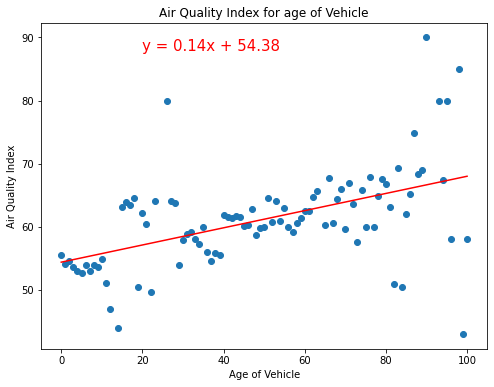

In [40]:
# Plot the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(veh_age_2009_df['vehicle_age'], veh_age_2009_df['AQI'])

# Plot the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(veh_age_2009_df['vehicle_age'], veh_age_2009_df['AQI'])
regress_values = veh_age_2009_df['vehicle_age'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(veh_age_2009_df['vehicle_age'], regress_values, "r-")
plt.annotate(line_eq,(20,88),fontsize=15,color="red")

# Set the title and axis labels   
plt.title("Air Quality Index for age of Vehicle")
plt.xlabel("Age of Vehicle")
plt.ylabel("Air Quality Index")
                                                      
# Calculate the correlation coefficient
print(f"The r-squared is: {rvalue**2}")

#plt.savefig("../Images/AQI_veh_age.png",bbox_inches="tight", pad_inches=.3)

plt.show()

The lower quartile is: 56.24414172783737
The upper quartile is: 64.28538223140495
The interquartile range of is: 8.041240503567579
The the median of is: 60.65546218487395 
Values below 44.182280972486005 could be outliers.
Values above 76.34724298675633 could be outliers.


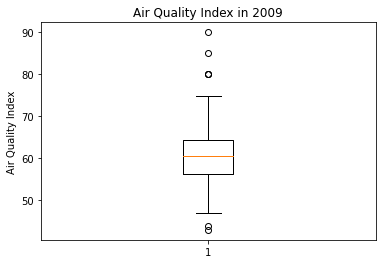

In [41]:
# Calculate quartiles, IQR, and identify potential outliers
quartiles = veh_age_2009_df['AQI'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range of is: {iqr}")
print(f"The the median of is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Air Quality Index in 2009')
ax1.set_ylabel('Air Quality Index')
ax1.boxplot(veh_age_2009_df['AQI'])
plt.show()


,body_type,AQI
0,2DSD,66.968087
1,4DSD,66.117010
2,CMIX,58.000000
3,CONV,66.692478
4,CUST,72.666667
5,DELV,60.188811
6,DUMP,68.398876
7,FIRE,58.000000
8,FLAT,63.098592
9,H/IN,60.333333


TypeError: unsupported operand type(s) for /: 'str' and 'int'

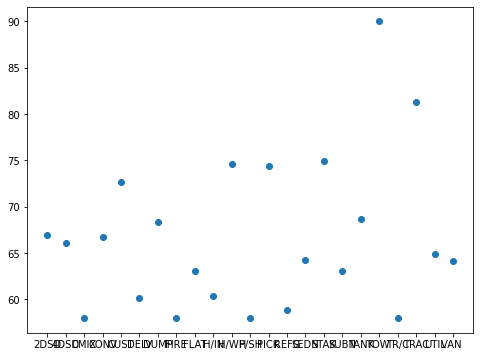